This file finds and graphs the frequencies of target words over time.

Author: Amy Weng 

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

directory = r'C:\Users\amycw\Desktop\ecbc research'
folder = directory+"\\"+'eebo_clean'
eicfile = directory + "\\" + 'eic_dated.csv'
monopolyfile = directory + "\\" + 'monopoly_dated.csv'

In [ ]:
def authors(filename, start, end):
    authors = {} 
    readFile = pd.read_csv(filename) 
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        if (int(date) in range(start, end)):
            a = data.iloc[0].author
            if a not in authors.keys(): 
                authors[a] = 0
            authors[a] += 1
    for k,v in sorted (authors.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
        print(k + ": " + str(v) + " ")

In [ ]:
authors(eicfile,1660,1714)

In [ ]:
authors(monopolyfile,1660,1714)

In [ ]:
def titles(filename, start, end):
    titles = {} 
    readFile = pd.read_csv(filename) 
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        if (int(date) in range(start, end)):
            t = data.iloc[0].title
            if t not in titles.keys(): 
                titles[t] = 0
            titles[t] += 1
    for pair in sorted (titles.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
        print(pair)
        print("\n")

In [ ]:
titles(eicfile, 1660,1714)

In [ ]:
def scatter(dates,freqs,title,color):
    xData = list(map(int, dates))
    yData = list(map(int, freqs))
    xyCoords=np.c_[xData,yData]
    uniquePoints, counts = np.unique(xyCoords, return_counts=True,axis=0)
    plt.scatter(uniquePoints[:,0],uniquePoints[:,1],s=counts*10,c=color,)

    fig = plt.gcf()
    fig.set_size_inches(10, 10)

    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Frequency", fontsize=20)
    plt.title(title,fontsize=20)
    plt.show()

In [ ]:
def scatter3D(dates, yFreq, zFreq, title, ylabel, zlabel,color):
    x = list(map(int, dates))
    y = list(map(int, yFreq))
    z = list(map(int, zFreq))

    plt.figure(figsize = (10, 10))
    ax = plt.axes(projection ="3d")

    ax.scatter3D(x, y, z, color = color)
    plt.title(title)
    ax.set_xlabel("Year", fontweight ='bold')
    ax.set_ylabel(ylabel, fontweight ='bold')
    ax.set_zlabel(zlabel, fontweight ='bold')
    plt.show()

In [ ]:
def bar(dates,freqs,title):
    xData = list(map(int, dates))
    yData = list(map(int, freqs))
    plt.bar(xData,yData)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
dates = []
freqs = []
freqDates = {}  
def freqOverTime(filename, word, start, end):
    count = 0 
    readFile = pd.read_csv(filename) 
    for i in range(len(readFile.index)):
        data = readFile[i:(i+1)]
        date = data.iloc[0].date
        if (int(date) in range(start, end)):
            text = data.iloc[0].text
            if (re.search(word,text)!=None): 
                count += 1
                dates.append(date)
                freqs.append(len(re.findall(lexicon,text)))
                if date not in freqDates.keys(): 
                    freqDates[date] = 0
                freqDates[date] += 1
    print("The total number of texts is "+str(count))
    for pair in sorted (freqDates.items(), key=lambda kv:(kv[1], kv[0]), reverse=True):
        print(pair)

In [46]:
eic = re.compile("east india company|east-india company|east-india-company")
monopoly = re.compile('monopoly|monopolization|monopolies|monopolium|monopolion|monopolie|monopolist|monopolizer|monopolize|monopolizes|monopolye|monopolyes')
lexicon = re.compile('free trade|private trade')

medical = re.compile("corruption|consumption|body politick|corrupt|consume|wasting|waste|blood|physician|decay|body|canker|cancer|disease|illness|remedy|cure|sickness|hepatitis|fever|spirit|brain|mind|vital|therapeutic|degeneration|degenerate|plague|smells|putrid|bad|tetrid|breathing|wholesome|healthy|unhealthy|sane|insane|nervous|languish|faculties|enfeeblement|drinks|tuberculosis|constitution|bile|black bile|yellow bile|phlegm|lung|sores|fog|smoke|diagnosis|prognosis|fiber|atrophy|morbid|mortal|mortality|nerves|inanition|defect|distemper|swelling|upset|stomach|cough|exercise|unwholesome|evacuation|fatal|fatality|vessels|hemmorrhage|bleeding|bleed|melancholy|diabetes|asthma|vomit|opiate|opium|ulcer|envy|jealousy|spoil|liver|vein|supple|heart|mouth|cured|pox")
economic = re.compile("economy|economic|oikonomike|household|price|prices|value|trade|traffic|traffique|money|bullion|exchange|luxury|spending|scarcity|plenty|east indies|corporation|west indies|carribean|india|corporation|company|merchant|merchants|plentitude|currency|calculation|public measure|consumables|superfluous|over-ballancing|over-balancing|impoverishing|gain|commerce|gold|silver|copper|ships|ship|debt|credit|debtor|creditor|decoctor|bank|usury|interest|rates|sugar|tobacco|beer|wool|uncharitable|charity|broker|monopoly|monopolization|monopolies|monopolium|monopolion|monopolie|monopolist| monopolizer|monopolize|monopolizes|monopolye|monopolyes|importation|exportation|silk|coin|unnecessary|necessary|efficient|under-valuation|employment|immodest|immoderate|prodigality|austerity|excess|excessive|vital|artificial|goods|natural|cheap|expensive|victual|treasure|commodities|international|income|commodity|revenue|land|profitable|unprofitable|industry|work|ware|loss|transportation|balance|usurer|estate|corruptible|property|prosperity|substance|disturber|consumer|cloth|drapery|use|non-use|profusion|tea|spices|china|free trade|means|flourish")
political = re.compile("commonwealth|politick|politic|political|body politick|body politic|government|prince|war|ruler|king|queen|extortion|oppression|restoration|revolution|constitution|navy|military|army|strength|power|might|england|britain|ireland|netherlands|scotland|netherlands|dutch|spanish|germany|holy roman empire|mughal|christian|christianity|god|state|country|parliament|crisis|common|lords|lord|crisis|national|governor|public|publicke|low countries|controversy|controversies|authority|empire|bills|treatise|treatises|civilian|protection|pirates|pirate|civil war|massacre|indonesia|india|china|argier|tunis|kingdom|provincial|scandalous|scandal|majesty|subject|christiandom|enemy|turkish|ally")

# meed | mede | corrupt | corruption | bribe | bribery | presents | gifts | gifting | graft | gratuity | rewards | benefits | poison | extortion | favor | favour | gentle rewards | good turns | putrid | decay | dissolution | contamination | depravity | wickedness | corruptionem | corruptio | spoiling | seducing | destroy | seduce | perversion | vitiation | vitiare | impairment | vitium | vice | perverto | nabobs | nabob

In [47]:
freqOverTime(eicfile,lexicon,1660,1714)

The total number of texts is 51
(1696, 47)
(1699, 42)
(1700, 41)
(1695, 40)
(1691, 36)
(1698, 28)
(1689, 28)
(1697, 27)
(1693, 23)
(1681, 22)
(1676, 21)
(1694, 19)
(1672, 18)
(1669, 18)
(1660, 18)
(1682, 14)
(1666, 14)
(1677, 13)
(1675, 12)
(1692, 11)
(1680, 11)
(1663, 8)
(1662, 8)
(1688, 7)
(1664, 7)
(1685, 6)
(1684, 6)
(1667, 6)
(1665, 6)
(1690, 5)
(1687, 5)
(1683, 5)
(1673, 5)
(1668, 2)


In [ ]:
scatter(dates,freqs,"Term frequencies of free/private trade in EIC texts 1660-1714","purple")

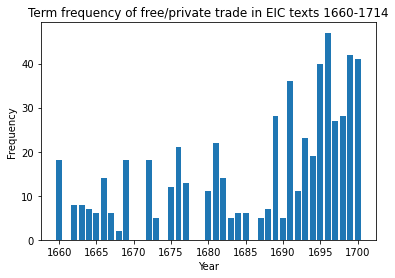

In [48]:
bar(freqDates.keys(),freqDates.values(),"Term frequency of free/private trade in EIC texts 1660-1714")